In [3]:
# Top-level cell to import numpy at the beginning
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.misc

# The NumPy library

NumPy is a third-party package that supports and integrates scientific computing within the Python environment. The built-in tools provided by the standard Python library oftentimes prove to be too inefficient for more advanced calculations, for instance in the case of data analysis. Since its introduction, NumPy became the de-facto standard extension for scientific computing, and it is currently one of the most widely used package for the calculation of multidimensional arrays and large arrays, with a focus on highly efficient computation.

If we were to identify the most relevant entities within the NumPy library, we would have just two main actors: N-dimensional arrays (`ndarray`) and universal functions (`ufunc`). We will discuss them in details within the various notebooks of this module. We will start focusing on data structures first, and then we will take into account universal functions.

## Multidimensional arrays

At the heart of the library, there is one main data structure: N-dimensional arrays, or *ndarrays* for short, represented by objects of the class `ndarray`. Multidimensional arrays are homogeneous arrays with a predetermined number of items. They are homogeneous because all the items they contain must be of the same type (thus occupying the same size in memory). Let's start by creating a simple one-dimensional array object. To create a new array from some initial data we can use the `numpy.array()` function:

In [83]:
an_array = np.array([1, 2, 3])
print(f'{type(an_array) = }')
print(f'{an_array = }')

type(an_array) = <class 'numpy.ndarray'>
an_array = array([1, 2, 3])


The type of the items is specified by another object: `dtype`, that stands for data-type. Each `ndarray` is associated with one and only one data-type object that can be retrieved via the attribute `dtype`.

In [87]:
print(f'{an_array.dtype = }')

an_array.dtype = dtype('int32')


Since we haven't specified a particular `dtype` when creating our array, NumPy determined the most suitable type for us by examining the items we want our array to contain. In this case it opted for the `int32` data-type. Be aware that the result of `dtype` (and other attributes) may vary among different platforms. 

Each `ndarray` is characterized by a number of dimensions and a shape. In the context of NumPy, dimensions are also called *axes* and the number of axes is sometimes called *rank*. The number of dimensions can be accessed via the attribute `ndim`. With the term *shape*, we identify the number of items along each dimensions in a given array. The shape is represented as a tuple of `ndim` positive integers that specifies the size of the array along dimension. The shape of the array basically describes how far an index can vary along each dimension. We can inspect the shape of an array using the `shape` attribute.

In [85]:
print(f'{an_array.ndim = }')
print(f'{an_array.shape = }')

an_array.ndim = 1
an_array.shape = (3,)


As we can see, our array has just one dimension (axis), i.e., it has a rank of $1$. Its shape is a tuple of a single element that tells us how many items are stored in the array along its only dimension. NumPy arrays are mutable, but they are also are fixed in size. This means that we can change the value of an item within the array after it has been initialized but the size acquired at time of creation remains unchanged throughout the whole lifespan of the array. We can inspect the total number of items contained in the array via the `size` attribute.

In [86]:
print(f'{an_array}, {id(an_array)}, {an_array.size}')
an_array[0] = 0
print(f'{an_array}, {id(an_array)}, {an_array.size}')
extended_array = np.concatenate((an_array, [4, 5, 6]))
print(f'{extended_array}, {id(extended_array)}, {extended_array.size}')

[1 2 3], 2721449980336, 3
[0 2 3], 2721449980336, 3
[0 2 3 4 5 6], 2721451207920, 6


Because every array is a homogeneous collection of items with exactly the same data-type, each of them takes up a block of memory of the same size, and each block
of memory in the array is interpreted in exactly the same way. The attribute `itemsize` tells us how many bytes are required to store each item in the array.

In [89]:
print(f'{an_array.itemsize = }')
an_array[0] = 1.5
print(f'{an_array}')

an_array.itemsize = 4
[1 2 3]


By using `object` arrays, we could effectively have heterogeneous arrays, but NumPy would still see each element of the array as exactly the same thing: i.e., a reference to a Python object.

In [91]:
obj_array = np.array([1, 2, 3], dtype="object")
obj_array[0] = 1.5
print(f'{obj_array}')

[1.5 2 3]


Now let's define another array with a higher dimensionality:

In [93]:
another_array = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]) # Pay attention to the enclosing square brackets!
print(f'{type(another_array) = }')
print(f'{another_array.dtype = }')
print(f'{another_array.ndim = }')
print(f'{another_array.size = }')
print(f'{another_array.shape = }')

type(another_array) = <class 'numpy.ndarray'>
another_array.dtype = dtype('float64')
another_array.ndim = 2
another_array.size = 6
another_array.shape = (2, 3)


The array we have just defined, `another_array`, is a $2\times 3$ multidimensional array, therefore it has a rank of 2 and a shape of `(2, 3)`. Note that, if we see our array as a matrix, the first axis refers to the rows and the second axis refers to the columns. Its `dtype` has now be selected to be `float64`, since we are initializing it with `float` objects. Its `size` is $6$ because it contains a total of $6$ items, $3$ along each of its $2$ rows.

The actual data an an `ndarray` object is stored into a memory buffer that is accessible via the `data` attribute.

In [95]:
print(f'{another_array.data = }')
print(f'{type(another_array.data) = }')

another_array.data = <memory at 0x00000279A2C5EEE0>
type(another_array.data) = <class 'memoryview'>


Usually we never access data through this buffer, though. We would use some form of indexing instead. We can access a single item within our array, using the `[]` operator and specifying a (valid) index for each dimension with commas used as separators. More advanced form of indexing will be addressed later. All arrays in NumPy are indexed starting at `0`, following the Python convention. Note that we can also pass a single tuple as an index since in Python `X[(exp1, exp2, ..., expN)]` is equivalent to `X[exp1, exp2,..., expN]` (the latter is just syntactic sugar for the former).

In [96]:
index = (1,2)
print(f'{another_array[1,2] = }')
print(f'{another_array[index] = }')
print(f'{another_array[3,2] = }')

another_array[1,2] = 6.0
another_array[index] = 6.0


IndexError: index 3 is out of bounds for axis 0 with size 2

## Data types
Python usually defines only one data-type of a particular data class. This can be convenient for some applications, but it is quite limited for scientific applications. NumPy defines multiple fundamental built-in Python data-type-descriptor objects, which are mostly based on the types available in the C language that CPython is written in. NumPy arrays are designed to work with a wide variety of elementary data-types.

| **Type** | **Description** |
|---|---|
| `bool_` | Boolean (`true` or `false`) stored as a byte |
| `int_` | Default integer type (same as C `long`, usually either `int64` or `int32`) |
| `intc` | Identical to C `int` (usually `int32` or `int64`) |
| `intp` | Integer used for indexing (same as C `size_t`, usually either `int32` or `int64`) |
| `int8` | Byte (–128 to 127) |
| `int16` | Integer (–32768 to 32767) |
| `int32` | Integer (–2147483648 to 2147483647) |
| `int64` | Integer (–9223372036854775808 to 9223372036854775807) |
| `uint8` | Unsigned integer (0 to 255) |
| `uint16` | Unsigned integer (0 to 65535) |
| `uint32` | Unsigned integer (0 to 4294967295) |
| `uint64` | Unsigned integer (0 to 18446744073709551615) |
| `float_` | Shorthand for `float64` |
| `float16` | Half precision `float`: sign bit, 5-bit exponent, 10-bit mantissa |
| `float32` | Single precision `float`: sign bit, 8-bit exponent, 23-bit mantissa |
| `float64` | Double precision `float`: sign bit, 11-bit exponent, 52-bit mantissa |
| `complex_` | Shorthand for `complex128` |
| `complex64` | Complex number, represented by two 32-bit floats (real and imaginary components) |
| `complex128` | Complex number, represented by two 64-bit floats (real and imaginary components) |

Associated with each data-type is a Python type object whose instances are array scalars. This type-object can be obtained using the `type` attribute of the `dtype` object.  Names for the data-types that would clash with standard Python object names are followed by a trailing underscore. Python and NumPy types that map to the same representation can be used interchangeably.

As we have seen earlier, when we use `array()` to create a new array object without specifying any data-type, NumPy will determine the most suitable data type for us according to the values contained in the sequence of lists or tuples we provided. We can also explicitly specify the desired `dtype` by passing it as a keyword argument to `array()`.

In [12]:
would_be_ints = np.array([1, 2, 3], dtype=complex)
print(would_be_ints)
print(f'{would_be_ints.dtype = }')

[1.+0.j 2.+0.j 3.+0.j]
would_be_ints.dtype = dtype('complex128')


Keep in mind that `dtype` objects are far more flexible, though. They can contain references to arrays of other `dtype` objects as well and, therefore, can be used to define nested records. Also, beware of type coercion: every item in the array will be coerced to the selected data-type.

# Basics of NumPy arrays

We have seen the two main components of NumPy arrays: the raw array data (the data buffer) and the information about its data type. Informally, we can think of the data buffer in the same way we would think about C arrays: a contiguous and fixed-size block of memory containing a certain number of fixed-size elements. Under the hood, a NumPy array contains far more information describing how to interpret its data. An array tracks information such as:
- The basic data elements size in bytes
- The start of the data within the data buffer
- The number of dimensions and the size of each dimension
- The separation between elements for each dimension, called *stride*
- The byte order of the data, which may different from the operating system byte order
- Whether the buffer is read-only
- Information (via `dtype`) about the interpretation of the basic data element
-  Whether the array is to interpreted as C-order (row-major) or Fortran-order (column-major)

Now that we have seen the data structure at the heart of NumPy, let's see how to use them firsthand. Note: in this section we will tackle creating arrays in a procedural way. At the end of the notebook there is a subsection dedicated to importing arrays from other data sources.

## Creating one- and multi-dimensional arrays

To create a new array, we can follow different strategies. The most common one uses a list or sequence of lists as arguments to the type constructor `numpy.array()`. The `array()` function, in addition to lists, can accept tuples and sequences of tuples as well. It can also accept sequences of tuples and lists mixed together. As a suggestion, it is usually better to stick with one sequence type, though, for mere code clarity.

In [28]:
a1x4 = np.array(['a', 'b', 'c', 'd'])
a2x2 = np.array((('a', 'b'), ('c', 'd')))
a3x2 = np.array([['a', 'b'], ('c', 'd'), ['e', 'f']])

### Prefilled and empty arrays

The NumPy library also provides a set of functions to generate arrays with a procedurally generated initial content. They offer shorthand notation to initialize potentially large data structures in a convenient way. The functions `numpy.zeros()` and `numpy.ones()` allows us to create arrays of a given shape, filled with zeroes or ones respectively.

In [33]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [32]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

The function `numpy.full()` allows us to create arrays of a given shape filled with a single scalar value.

In [102]:
np.full((3, 4), 3.14)

array([[3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14]])

Sometimes, we may need an array of a given shape and data type, with little concern about its contents. In such a scenario, we can create an empty array.
Since there is no need to initialize our data structure, this can save a little bit of time, especially when working with large arrays.
We have still to ensure that, at some point, our data will be properly initialized, though.

In [3]:
np.empty(3, dtype=float)

array([6.99416046e-009, 3.39092282e+214, 3.02259273e-110])

Here we have generated a new array with three floating point elements. There is no guarantee that the elements have any particular values, and the actual values will vary from time to time. For this reason, it is important that all values are explicitly assigned before the array is used, otherwise unpredictable errors are likely to arise.

### Ranged arrays

The functions `numpy.arange()` and `numpy.linspace()` can be used to create one-dimensional arrays of evenly spaced values within a given interval. The first one allows us to specify the step size and infers the number of steps. The second one allows us to specify the number of steps and infers the step size.

The `arange()` function accepts arguments similar to the `range()` Python built-in, so we can specify the start and end values for the range, as well as a step size.

In [34]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In this case, it is also possible to use decimal values as step.

In [35]:
np.arange(12, 20, 0.5)

array([12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5])

A different approach for creating ranged arrays relies on using `linspace()`. Such a method splits a given interval into a set of equally spaced samples. In short, this method takes as its first two arguments the initial and end values of the desired interval. The third argument defines the number of elements into which we want the interval to be split.

In [104]:
np.linspace(0, 100, 10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

The `arange()` and `linspace()` functions create one-dimensional arrays. To generate multi-dimensional arrays we can combine them with the `ndarray.reshape()` function. This function reorganizes an array giving it a new shape without changing its data. Note that the new shape of the array must be compatible with the previous one.

In [6]:
np.arange(0, 10).reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [41]:
np.arange(0, 10).reshape(4,3)

ValueError: cannot reshape array of size 10 into shape (4,3)

In [42]:
np.arange(0, 12).reshape(4,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

We can use the special value `-1` to indicate that the size of one of the dimensions should be inferred from the length of the array and remaining dimensions.

In [101]:
np.arange(0, 12).reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

### Random arrays
We can also generate arrays already filled with random values. This is possible using the `random()` function of the `numpy.random` module. Using this function we can directly specify the desired shape.

In [39]:
np.random.random(10)

array([0.40524309, 0.50786294, 0.38381447, 0.21518105, 0.34706197,
       0.55967179, 0.34946297, 0.3732817 , 0.44066641, 0.65631041])

In [46]:
np.random.random((3,3)) # Pay attention to the number of arguments: it must be a single one!

array([[0.21675478, 0.74752618, 0.53948595],
       [0.49734658, 0.96822336, 0.54452872],
       [0.82276351, 0.5787683 , 0.09411018]])

### Meshgdrid arrays
Multidimensional coordinate grids can be generated using the function `np.meshgrid`.
For instance, given two one-dimensional coordinate arrays (i.e., arrays containing coordinates along a given dimension), we can generate two-dimensional coordinate arrays.

In [6]:
x = np.array([-1, 0, 1])
y = np.array([-2, 0, 2])
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-2 -2 -2]
 [ 0  0  0]
 [ 2  2  2]]


A common use-case of the two-dimensional coordinate arrays, is to evaluate functions over two variables. This can be used when plotting functions over two variables. Suppose we want to plot the following function in the domain given by $X=[-6, 6]$ and $Y=[-6, 6]$:
$$
f(x,y) = \sin{\sqrt{x^2 + y^2}}
$$

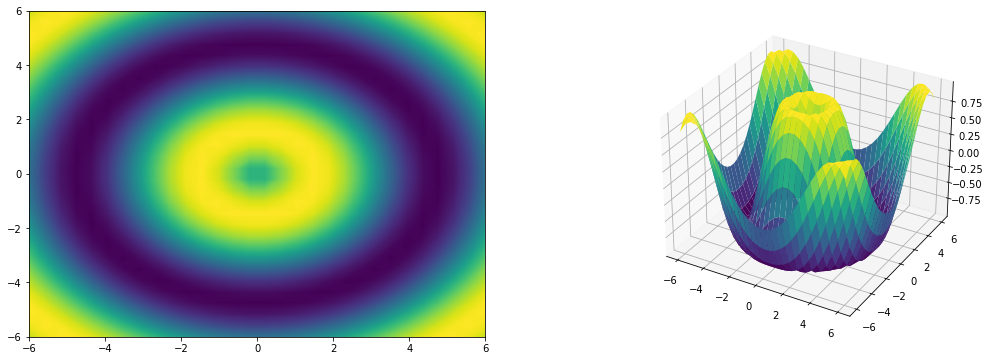

In [145]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

fig = plt.figure(figsize=(18, 6))

# 2d colormap
ax = fig.add_subplot(1, 2, 1)
ax.contourf(X, Y, Z, 250)

# 3d projection
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

plt.show()

It is also possible to generate higher-dimensional coordinate arrays by passing more arrays as arguments to the `np.meshgrid` function. Alternatively, the functions `np.mgrid` and `np.ogrid` can also be used to generate coordinate arrays, with their specific syntax.

### Arrays with similar properties
It is often necessary to create new arrays that share properties, such as shape and data type, with another array. There is a whole family of functions for this purpose, such as `np.ones_like`, `np.zeros_like` and `np.empty_like`. A typical use case is a function that takes arrays of unspecified type and size as arguments and requires working arrays of the same size and type. In the following example we have a generic function `f` that instantiates a new array of ones with the same properties of its input argument.

In [29]:
def f(x):
    y = np.ones_like(x)
    # ... do something useful ...
    return y

x = np.arange(12).reshape(3, 4)
print(f'{x = }\n{f(x) = }')

x = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
f(x) = array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])


### Matrix arrays

Matrices, or two-dimensional arrays, are quite relevant in the context if numerical computing. NumPy provides functions for generating commonly used matrices.

In [30]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [35]:
np.eye(3, k=1) # k offsets the position of the ones. Using k = 0 has the same behaviour of numpy.identity

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [39]:
np.diag(np.arange(0, 25, 5)) # A matrix with a ranged diagonal with a given stride

array([[ 0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 20]])

You may be aware that NumPy supports a subclass dedicated explicitly to 2d arrays, conveniently called `matrix`.
Such a class is used to represent a matrix, constructed from an array-like object, or from a string of data, and can be seen as a specialized bi-dimensional array that retains its shape and nature through operations. It also has certain special operators, such as `*` for matrix multiplication and `**` for matrix power. Despite being available, it is better to use regular arrays rather than `matrix`, even for linear algebra applications, since this class is currently in the process of being deprecated and could be removed altogether from future releases of the NumPy library.

## Arithmetic operations

The most basic operations we can think of applying to our data are arithmetic operators. We can use all the usual arithmetic operators with `ndarrays` to perform the corresponding operation in a *vectorized* fashion. For instance, we can add or multiply an array by a scalar:

In [15]:
a = np.arange(0, 10)
print(f'{a = }')
print(f'{a + 3 = }')
print(f'{a * 3 = }')

a = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a + 3 = array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
a * 3 = array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])


These operators can also be used between two arrays. The operators are applied between corresponding elements, by position, i.e., *element-wise*. The end result will be a new array containing the results in the same locations of the initial operands.

In [14]:
b = np.arange(10, 20)
print(f'{b = }')
print(f'{a + b = }')
print(f'{a * b = }')

b = array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
a + b = array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])
a * b = array([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])


Besides basic arithmetical operations, NumPy defines a vast selection of mathematical function that we can apply to our arrays in a vectorized way. We will see them in greater details when discussing universal functions.

In [106]:
print(f'{np.power(b, 3)}')

[ 8000 10648 13824 17576 21952 27000 32768 39304 46656 54872]


Everything we have seen so far apply to multidimensional arrays as well. Operators are still applied in a element-wise fashion.

In [8]:
a = np.arange(3, 12, dtype=np.int_).reshape(3, 3)
b = np.ones((3, 3), dtype=np.int_)
print(f'{a + b = }')

a + b = array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])


Note that, in the case of matrices, the operator `*` is still the element-wise product. In case we want to perform matrix multiplication, we have to rely on the `numpy.dot()` method.

In [10]:
a = np.arange(0, 12, dtype=np.int_).reshape(3, 4)
b = np.arange(0, 8, dtype=np.int_).reshape(4, 2)
print(f'{np.dot(a,b) = }') # a second axis size matches b first axis size
print(f'{a * b = }')       # The arrays shapes are not compatible for element-wise product

np.dot(a,b) = array([[ 28,  34],
       [ 76,  98],
       [124, 162]])


ValueError: operands could not be broadcast together with shapes (3,4) (4,2) 

If we write operations such as the ones we have seen so far, every operation return a new array. If we are interested in modifying our data in place, we can use a slightly different notation. We can use a shorthand notation such as `+=` and `*=` to alter directly the left-hand operand. 

In [41]:
a = np.arange(0, 10)
b = np.arange(0, 10)
c = a + b
print(f'{id(a) = } {id(b) = } {id(c) = }')
print(f'{c = }')
a += b
print(f'{id(a) = } {a = }')

id(a) = 1643639256912 id(b) = 1643632436688 id(c) = 1643638118608
c =array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])
id(a) = 1643639256912 a = array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])


## Basic indexing



Items of an `ndarray` object can be accessed and assigned via indexing and slicing. NumPy's arrays can be indexed using the standard Python `x[obj]` syntax, where `x` is the array and `obj` a selection object. There are different kinds of indexing available depending on `obj`: basic indexing, advanced indexing and field access. In this section we focus on basic indexing, we will tackle advanced indexing at a later stage.

Basic indexing occurs when the selection object is a `slice` object (constructed using the `start:stop:step` syntax inside of the brackets), an integer, or a tuple of `slice` objects and integers, optionally interspersed with `...` and `np.newaxis` objects. We have discussed Python's slicing syntax extensively in a previous module. NumPy leverages the same syntax to perform slicing on multidimensional arrays. Nevertheless, we have to take into account some peculiarities when slicing multidimensional arrays:
- Slicing can be done over multiple dimensions 
- Exactly one ellipsis object `...` can be used to indicate several dimensions at once
- Slicing cannot be used to expand the size of an array

Furthermore, when we use slicing in Python, the resulting arrays are copies. In NumPy, the resulting arrays are always views of the same underlying buffer. 

It's easier to describe indexing and slicing through examples, so let's start with one. Let's take into account a 3d array of size $3\times 4\times 5$. Our array will be printed as three separated *layers*, each of which is a 2d array of size $4\times 5$.

In [115]:
a = np.arange(60).reshape(3,4,5)
print(f'{a = }')

a = array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])


Let's start with some basic indexing. If our selection object is a tuple of integers with length equal to the number of dimensions, we are accessing a single element of our array.

In [109]:
print(f'{a[1, 0, 0] = }')

a[1, 0, 0] = 20


Note the order in which the indexes are resolved: if we visualize our three-dimensional array in a 3d space, the first index always refers to one of the depth-wise layers, the second index refers to one of the rows and the last index selects a column. If we omit some of the dimensions we end up accessing a portion of the array corresponding to the rest of the dimensions selected. This is equivalent to use the `:` notation in each of the omitted dimensions, to select all the available items across those axes.

In [20]:
print(f'{a[1] = }') # Print a part of the array taking into account only the second slice along the first dimension

a[1] = array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])


In [24]:
print(f'{a[1,:,:] = }') # This is equivalent to the syntax above, writing explicit selectors for all dimensions

a[1,:,:] = array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])


We can also use ellipsis `...` that are automatically expanded to the number of `:` objects needed for the selection tuple to index all dimensions. There may only be a single ellipsis present.

In [25]:
print(f'{a[1,...] = }') # This is equivalent to the previous two examples, using ellipsis

a[1,...] = array([[20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])


In [29]:
print(f'{a[...,3] = }') # Print all the elements of every fourth column

a[...,3] = array([[ 3,  8, 13, 18],
       [23, 28, 33, 38],
       [43, 48, 53, 58]])


In [31]:
print(f'{a[1,...,3] = }') # Print the fourth column taking into account only the second entry of the first dimension

a[1,...,3] = array([23, 28, 33, 38])


Basic slicing extends Python's basic concept of slicing to N dimensions. We can use the slicing syntax in any of the elements of our indexing tuple to restrict the access to a portion of the values across the corresponding dimension. Keep in mind that the lower-bound element is always included whereas the upper-bound element is not. The step value specifies the stride between elements.

In [116]:
print(f'{a[0,::2, ::2] = }') # Select the first entry on the first dimension and print all the even-indexed elements on the remaining dimensions

a[0,::2, ::2] = array([[ 0,  2,  4],
       [10, 12, 14]])


We can use `newaxis` objects in the selection tuple to expand the dimensions of the resulting selection by one unit-length dimension. For instance in the following example, the resulting array has the same items of the original one but an additional trailing dimension of size $1$.

In [113]:
a = np.arange(10)
print(f'{a[:, np.newaxis] = }')
print(f'{a[:, np.newaxis].shape = }')

a[:, np.newaxis] = array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])
a[:, np.newaxis].shape = (10, 1)


### Sliced arrays are views

All arrays generated by basic slicing are always views of the original array. If we assign values to a sliced `ndarray`, the original array will be affected by the changes as well.

In [123]:
a = np.arange(10)
print(f'{a[-2:] = }')
b = a[-2:] = [0, 1]
print(f'{b = }')
print(f'{a = }')

a[-2:] = array([8, 9])
b = [0, 1]
a = array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1])


## Memory layout

NumPy's arrays are very powerful data structures that let us manipulate and reason about data in multiple dimensions. But how are these multi-dimensional data structures actually stored in memory? Memory in our computers is addressed in a linear fashion, therefore the items of a multi-dimensional array cannot be arranged in a multi-dimensional layout in memory. We need to distinguish between the the multi-dimensional array layout that we see as NumPy users and the one-dimensional memory layout that NumPy uses under the hood. In order to have a better understanding of how our code will work when dealing with these data structures, it is useful to learn a little more about how multi-dimensional arrays are represented in memory. 

### Contiguous memory layout

An instance of class `ndarray` consists of a contiguous one-dimensional segment of computer memory, combined with an indexing scheme that maps N integers to the location of an item inside the block. There are many different schemes for arranging the items of an N-dimensional array in a 1-dimensional block. NumPy supports two different contiguous memory layouts: row- and column-major, also called C-style and Fortran-style respectively.

In the case of **row-major** layout, the last dimensional index *varies the fastest*. To move through computer memory sequentially, the last index is incremented first, followed by the second-to-last index and so on and so forth. In the case of **column-major** layout, the first dimensional index *varies the fastest*. To move through computer memory sequentially, the first index is incremented first until it reaches the limit in that dimension, then the second index is incremented and the first index is reset to zero.

The two styles of memory layout for arrays are connected through the transpose operation. A contiguous C-style array can be transformed in its Fortran-style counterpart via transpose.

<center><img src="column-row-major.png"></img></center>

### Non-contiguous memory layout

With a single-segment of memory representing the array, the one-dimensional index into computer memory can always be computed from the N-dimensional index. Let $n_i$ be the value of the $i$-th index into an array whose shape is represented by a given tuple of N integers $(d_0, ..., d_{N-1})$. The one-dimensional index into a C-style contiguous array is:

$$
n^C = \sum_{i=0}^{N-1}n_i\prod_{j=i+1}^{N-1}d_i
$$

Whereas, the one-dimensional index into a Fortran-style contiguous array is:

$$
n^F = \sum_{i=0}^{N-1}n_i\prod_{j=0}^{i-1}d_i
$$

For instance, in a C-style array of shape $4 \times 5\times 6$ the index (1, 3, 2) corresponds to the linearized value $$n^C_{(1,3,2)} = n_0 \cdot (d_1 \cdot d_2) + n_1 \cdot d_2+n_2 \cdot 1 = 1 \cdot (5 \cdot 6) + 3 \cdot 6 + 2 \cdot 1 = 50$$ Note that we use 1 as default value for the product of the dimensions in case $j\geq N$.

The product part of the formulae above represents what is called (element-wise) *stride*, i.e., how many elements in the underlying one-dimensional layout of the array one must jump in order to get to the next array element of a specific dimension in the N-dimensional layout. The byte-wise stride can be computed taking into account the `itemsize` multiplied by the element-wise stride. At a later stage, we will see how we can provide strides tuple of arbitrary integers to represent a more general layout for our arrays.

The `ndarray` object of NumPy uses this stride information and therefore the underlying memory of an `ndarray` can be laid
out non-contiguously. An important situation where irregularly strided arrays occur is array indexing.
Slice sub-arrays most likely are neither C- nor Fortran-contiguous. However, they can still be represented by an `ndarray` object using the same striding tuple as the original array used. Therefore, a regular indexing expression on an `ndarray` can always produce an `ndarray` object without copying any data. This is what we called a *view* before, when we introduced slicing. The greatest benefit of this feature is that it allows indexing to be done very rapidly and without exploding memory usage, since there are no copies involved.

<center><img src="non-contiguous.png"></img></center>

## Broadcasting

In NumPy **broadcasting** denotes the ability to automatically guess a common, compatible shape between two arrays. 
For instance, when adding a one-dimensional array and a scalar, i.e., a zero-dimensional array, the scalar is implicitly extended to a vector. 
The general mechanism is performed automatically. Informally, we can see broadcasting as trying to figure out a sensible way of doing element-wise operations between two arrays of different but compatible shapes, for instance:

$$
\begin{pmatrix}
1 & 2 & 3\\ 
4 & 5 & 6
\end{pmatrix}
+
\begin{pmatrix}
1 & 2 & 3
\end{pmatrix}
=
\begin{pmatrix}
2 & 4 & 6\\ 
5 & 7 & 9
\end{pmatrix}
$$

$$
\begin{pmatrix}
1 & 2 & 3\\ 
4 & 5 & 6
\end{pmatrix}
+
\begin{pmatrix}
1 \\
2
\end{pmatrix}
=
\begin{pmatrix}
2 & 3 & 4\\ 
6 & 7 & 8
\end{pmatrix}
$$

When NumPy is given two arrays with different shapes and has to perform an operation that would require the two shapes to be the same, both arrays are broadcast to a common shape. Arrays of smaller dimension are broadcast to match the larger arrays without copying the data. Suppose the two arrays have shapes $s_1$ and $s_2$, broadcasting consists of the following two steps:
1. If the shape $s_1$ is shorter than the shape $s_2$, i.e., `len(s1) < len(s2)`, then ones are added on the left of the shape $s_1$. This operation is called *reshaping*.<br>
2. When the shapes have the same length, NumPy compares them element-wise and tries to match each dimension extending the smaller array to match the larger. This operation is called *extension* and is performed starting from the trailing (i.e., rightmost) dimensions and working its way left, looking for the following conditions:<br>
    - If the dimensions are equal, NumPy procedes to compare the next dimensions to the left.<br>
    - If one of the dimensions is $1$, then it is extended, by repeating elements, to match the other.<br>
    - If neither of the previous conditions is met, NumPy raises a `ValueError`.<br>

Suppose we want to add a vector $A$ of shape $(n,)$ to a matrix  $M$ of shape $(m,n)$, it would require broadcasting. The first operation to perform is reshaping: the shape of $A$ is converted from $(n,)$ to $(1, n)$. The second operation to perform is extension: first NumPy compares the rightmost dimensions, which are both $n$ so no extension is needed, then the leftmost dimensions are compared, which are $1$ and $m$ so $1$ will be extended to $m$ by repeating the values of $A$ across that dimension. As a result, the shape of the $A$ is converted from $(1, n)$ to $(m, n)$, by repeating its elements row-wise, allowing it to be added to $M$.

Arrays are said to be *broadcastable* if any of the following properties are satisfied:
1. The arrays all have exactly the same shape.
2. The arrays all have the same number of dimensions and the length of each dimensions is either a common length or 1.
3. The arrays that have too few dimensions can have their shapes prepended with a dimension of length 1 to satisfy property (2).

The image below shows this process on a practical example, we have a one-dimensional array of shape `(4,)` (on the right) that must be broadcast to match the shape of a `(4,4)` matrix (on the left). The light gray portion of the array is the result of the broadcast operation.

<center><img src="broadcast_ex1.png"></img></center>

In [13]:
M = np.array([[9, 10, 11, 12], [6, 7, 8, 9], [3, 4, 5, 6], [0, 1, 2, 3]])
A = np.array([0, 1, 2, 3])
print(f'{M + A = }')

M + A = array([[ 9, 11, 13, 15],
       [ 6,  8, 10, 12],
       [ 3,  5,  7,  9],
       [ 0,  2,  4,  6]])



There are instances in which automatic broadcasting is not possible. For instance, take into account the following image.
In such a case, we have to manually reshape the array in order to match the proper dimension.

<center><img src="broadcast_ex2.png"></img></center>

In [14]:
M = np.array([[9, 10, 11], [6, 7, 8], [3, 4, 5], [0, 1, 2]])
A = np.array([0, 1, 2, 3])
print(f'{M + A = }')

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In the example below, we have to reshape the array to shape (4,1) first, and then let broadcast happen. 

In [16]:
M = np.array([[9, 10, 11], [6, 7, 8], [3, 4, 5], [0, 1, 2]])
A = np.array([0, 1, 2, 3]).reshape(4,1) # Make the array a column array to match the second dimension of the matrix
print(f'{M + A = }')

M + A = array([[ 9, 10, 11],
       [ 7,  8,  9],
       [ 5,  6,  7],
       [ 3,  4,  5]])


### Broadcasting examples

There are a few common instances of reshaping/broadcasting that we may find ourselves doing over ad over, so it can be beneficial to address those specifically, and it may be beneficial to spend a little more time evaluating compatible shapes, so let's move on with some examples.

#### Shapes compatibility

Let's take into account various shapes, starting with `(2,3)`. Let's check it for compatibility with different shapes.
<center><img src="compatibility.png"></img></center>

A given shape is, of course, compatible with itself. 
It is also compatible with shapes in the form `(2,1)`, since we can extend the second dimension by replicating its elements. It is compatible with `(3,)` because it can be reshaped to `(1,3)` and then be extended. It is not compatible with `(3,2)` because swapping/reordering axes while checking for compatibility is not permitted. It is not compatible with `(2,)` because reshaping would produce `(1,2)`, since we have to prepend ones, and the the second dimensions would not match.

Let's move to higher dimensions with `(100, 10, 10, 10)`. Such a shape is compatible, among others, with `(100, 1, 1, 1)`, `(100, 10, 1, 1)`, `(100, 10, 10, 1)`, `(1, 10, 10, 10)`, `(1, 10, 1, 1)`, etc., as they can all be extended. It is not compatible with a shape such as `(100, 1, 1)` because we would have to prepend a dimension and the 100 would not match with 10 in the second position.

Let's go even further with `(1, 2, 3, 5, 1, 11, 13, 17)`. Is it compatible with `(1, 7, 1, 1, 17)`? 

It is, even though it is a bit trickier to see at first glance. It is convenient, in such a situation, to right-align the shapes in order to place in the same column corresponding dimensions. 

`(1, 2, 3, 5, 1, 11, 13, 17)`

`         (1, 7,  1,  1, 17)`

As long as every column has the same value, or has a one, we are good. After reshaping and extension, the broadcast shape would be: `(1, 2, 3, 5, 7, 11, 13, 17)`

#### Rows rescaling

Suppose we have a $n\times m$ matrix and we want to multiply each row by a coefficient. The coefficients are stored in a dedicated vector with $n$ components. In that case, automatic reshaping will not work, and we need to explicitly perform reshaping first.

<center><img src="rows_scaling.png"></img></center>

In [10]:
mat = np.array([[0, 1, 2, 3, 7], [2, 4, 5, 2, 1], [6, 3, 1, 6, 8]])
arr = np.array([3, 2, 2])
result = mat*arr.reshape(-1,1) # We don't have to use the actual size of the array
print(result)

[[ 0  3  6  9 21]
 [ 4  8 10  4  2]
 [12  6  2 12 16]]


#### Columns rescaling

As a counterpart to the previous example, assume we want to rescale each column by a given factor, stored in an array of size $m$ this time. In this case we don't need to use `reshape()` explicitly as the shapes of the two arrays are compatible.

<center><img src="cols_scaling.png"></img></center>

In [14]:
mat = np.array([[0, 1, 2, 3, 7], [2, 4, 5, 2, 1], [6, 3, 1, 6, 8]])
arr = np.array([3, 2, 2, 1, 3])
result = mat*arr
print(result)

[[ 0  2  4  3 21]
 [ 6  8 10  2  3]
 [18  6  2  6 24]]


#### Generating a 2d space

Let's suppose we have two vectors $v$ and $w$ and we want to define a matrix such as that $m_{ij} = v_i + w_j$. We can obtain such a result with a one-liner.

<center><img src="rows_per_col.png"></img></center>

In [19]:
v = np.array([0, 1, 2, 3, 7])
w = np.array([3, 2, 2])
M = v + w.reshape(-1,1)
print(M)

[[ 3  4  5  6 10]
 [ 2  3  4  5  9]
 [ 2  3  4  5  9]]


## Advanced indexing

Advanced indexing is triggered when the selection object is a non-tuple sequence object, an `ndarray` of either Booleans or integers, or a tuple with at least one sequence object or `ndarray` of either Booleans or integers. Advanced indexing (also called *fancy indexing*) always returns a copy of the data, in contrast with basic slicing that returns a view. There are two types of advanced indexing: integer and Boolean.

We have to be aware of whether we are using basic or advanced indexing, because their behaviour differ quite drastically, and we are responsible of using the most appropriate one for our purposes. For instance, the three following examples lead to different results, despite being extremely similar one to the other.

In [72]:
a = np.arange(pow(4,3)).reshape(4,4,4)
print(f'{a = }')

a = array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])


In [55]:
print(f'{a[(1, 2, 3),] = }') # Advanced integer indexing

a[(1, 2, 3),] = array([[[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])


In [48]:
print(f'{a[[1, 2, 3]] = }') # Advanced integer indexing, same as before

a[[1, 2, 3]] = array([[[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])


In [69]:
print(f'{a[(1, 2, 3)] = }') # Basic indexing, equivalent to a[1,2,3]

a[(1, 2, 3)] = 27


### Integer indexing

Integer indexing allows the selection of arbitrary items in the array based on their n-dimensional index. This kind of selection occurs when advanced selection is triggered and the selection object is not a sequence of Booleans.
Each integer sequence represents a number of indices into that dimension.

When using advanced integer-style indexing, we have to be aware of the following rules:
- If the length of the selection tuple is larger than the dimensions of the array, an error is raised.
- All sequences and scalars in the selection tuple are converted to `intp` indexing arrays.
- All selection tuple objects must be convertible to `intp` arrays, or slice objects, or the ellipsis object.
- Exactly one ellipsis object will be expanded, any other ellipsis objects will be treated as full slice objects. 
- If the selection tuple is smaller than the dimensions of the array, then as many `:` objects as needed are added to its end to match the required length.
- The shape of all the integer indexing arrays must be broadcastable to the same shape.

Negative values are permitted in the index arrays and work as they do with single indices or slices.

In [70]:
a = np.arange(1, 10)
print(f'{a = }')
print(f'{a[(1,-2,3,4),] = }')
print(f'{a[np.array([1,-2,3,4])] = }')
print(f'{a[(1,-2,3,-1),] = }')

a = array([1, 2, 3, 4, 5, 6, 7, 8, 9])
a[(1,-2,3,4),] = array([2, 8, 4, 5])
a[np.array([1,-2,3,4])] = array([2, 8, 4, 5])
a[(1,-2,3,-1),] = array([2, 8, 4, 9])


If the index values are out of bounds then an `IndexError` is thrown.

In [71]:
print(f'{a[(1,-2,12,-1),] = }')

IndexError: index 12 is out of bounds for axis 0 with size 9

When the index consists of as many integer arrays as dimensions of the array being indexed, the indexing is straightforward. Advanced indices are always broadcast and iterated as one.
```python
result[i_1, ..., i_M] == x[ind_1[i_1, ..., i_M], ind_2[i_1, ..., i_M], ..., ind_N[i_1, ..., i_M]]
```

Note that the resulting shape is identical to the broadcast indexing array shapes `ind_1, ..., ind_N`. If the indices cannot be broadcast to the same shape, an exception is raised.

In the following example we can see that if the index arrays have a matching shape, and there is an index array for each dimension of the array being indexed, the resulting array has the same shape as the index arrays, and the values correspond to the index set for each position in the index arrays.

In [76]:
a = np.arange(16).reshape(4,4)
print(f'{a = }')
print(f'{a[np.array([0, 2, 3]), np.array([0, 1, 2])] = }')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a[np.array([0, 2, 3]), np.array([0, 1, 2])] = array([ 0,  9, 14])


If the index arrays do not have the same shape, there is an attempt to broadcast them to the same shape. If they cannot be broadcast to the same shape, an exception is raised.

In [77]:
print(f'{a[np.array([0, 2, 3]), np.array([0, 1])] = }')

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

Broadcasting allows us to combine array indices with scalars. The effect is that the scalar value is used for all the corresponding values of the index arrays.

In [79]:
print(f'{a[np.array([0, 2, 3]), 2] = }')

a[np.array([0, 2, 3]), 2] = array([ 2, 10, 14])


As we have already informally seen before, it is possible to only partially index an array with index arrays. For a 2d array, such an operation results in the construction of a new array where each value of the index array selects one row from the array being indexed and the resultant array has the resulting shape `(number of index elements, size of row)`. In general, the shape of the resultant array will be the concatenation of the shape of the index array (or the shape that all the index arrays were broadcast to) with the shape of any unused dimensions (those not indexed) in the array being indexed.

In [20]:
a = np.arange(16).reshape(4,4)
print(f'{a[np.array([0, 2, 3])] = }')

a[np.array([0, 2, 3])] = array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])


#### Example: corners and borders of a 2d array
Given a 2d array, let's see how we can select all its corner elements and all the elements along its borders.

In [87]:
a = np.arange(12).reshape(3,4)
print(f'{a = }')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])


In [88]:
rows = np.array([[0, 0], [2, 2]])
cols = np.array([[0, 3], [0, 3]])
print(f'{a[rows, cols] = }')

a[rows, cols] = array([[ 0,  3],
       [ 8, 11]])


We can obtain the same result exploiting broadcasting.

In [93]:
rows = np.array([0, 2])
cols = np.array([0, 3])
print(f'{a[rows[:,np.newaxis], cols] = }') # newaxis temporarily promotes rows as an higher-dimension array

a[rows[:,np.newaxis], cols] = array([[ 0,  3],
       [ 8, 11]])


Another way to obtain the same results uses the `ix_` method to generate a meshgrid from our two monodimensional sequences.

In [96]:
print(f'{a[np.ix_(rows, cols)] = }')

a[np.ix_(rows, cols)] = array([[ 0,  3],
       [ 8, 11]])


The borders are even more straightforward to identify, since we just need to index either a whole row or a whole column.

In [107]:
print(f'Top/bottom borders: {a[[0,2]]}')
print(f'Left/right borders: {a[:,[0,3]]}')

Top/bottom borders: [[ 0  1  2  3]
 [ 8  9 10 11]]
Left/right borders: [[ 0  3]
 [ 4  7]
 [ 8 11]]


### Boolean indexing

Boolean advanced selection occurs when the selection object is an array object of Boolean type, such as the result of comparison operators. 
In the special case when the number of dimensions of the selection object matches the number of dimension of the filtered object, Boolean selection returns a one-dimensional array filled with the elements of the array corresponding to the `True` values of the selection object itself. 

The search order will be C-style. If the selection object has `True` values at entries that are outside of the bounds of the array, then an `IndexError` will be raised. In the other case, missing entries are treated as `False`.

In [26]:
a = np.arange(9).reshape(3, 3)
mask = np.array([[1, 0, 0], [0, 1, 0], [1, 0, 1]], dtype=bool)
print(a)
print(mask)
print(a[mask])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ True False False]
 [False  True False]
 [ True False  True]]
[0 4 6 8]


We can also use Boolean arrays as element of the selection tuple. In such instances, they will always be interpreted as `nonzero(obj)`, which return a tuple containing the indices of all non-zero elements of a given array, and the equivalent integer indexing will be done. A common use case for this is filtering for desired element values. For example, we may wish to select all entries from an array which are not `NaN`.

In [115]:
a = np.array([[1, 2, 3], [4, np.nan, 6], [np.nan, np.nan, 9]])
print(f'{a = }')
print(f'{np.isnan(x)= }')
print(f'{a[~np.isnan(x)] = }')

a = array([[ 1.,  2.,  3.],
       [ 4., nan,  6.],
       [nan, nan,  9.]])
np.isnan(x)= array([[False, False, False],
       [False,  True, False],
       [ True,  True, False]])
a[~np.isnan(x)] = array([1., 2., 3., 4., 6., 9.])


More generally, we can apply a custom selection criteria and exploit Boolean filtering to obtain only the matching results.

In [123]:
a = np.arange(25).reshape(5,5)
print(f'{a = }')
print(f'{a[a>15] = }')

a = array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
a[a>15] = array([16, 17, 18, 19, 20, 21, 22, 23, 24])


In general, when the Boolean array has fewer dimensions than the array being indexed, this is equivalent to `a[b, ...]`, which means `a` is indexed by `b` followed by as many `:` as are needed to fill out the rank of `a`. The shape of the result is one dimension containing the number of `True` elements of the Boolean array, followed by the remaining dimensions of the array being indexed.

In [129]:
a = np.arange(25).reshape(5, 5)
b = a > 15
print(f'{b = }')
print(f'{b[:,3] = }')
print(f'{a[b[:,3]] = }')

b = array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])
b[:,3] = array([False, False, False,  True,  True])
a[b[:,3]] = array([[15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])


#### Example: rows with given sum

Let's say we want to use Boolean indexing to select all rows adding up to a given number. We can write something along the line of what follows:

In [27]:
a = np.array([[1,3,5], [1,1,1], [2,1,0], [3,1,2]])
TARGET = 3
print(a.sum(-1)) # Sum along last axis (i.e., rows)
rows = (a.sum(-1)) == TARGET
print(f'{rows = }')
print(f'{a[rows,:] = }')

[9 3 3 6]
rows = array([False,  True,  True, False])
a[rows,:] = array([[1, 1, 1],
       [2, 1, 0]])


#### Example: Boolean indexing on images

We will now use Boolean indexing on a sample image, to see it in action, visually.

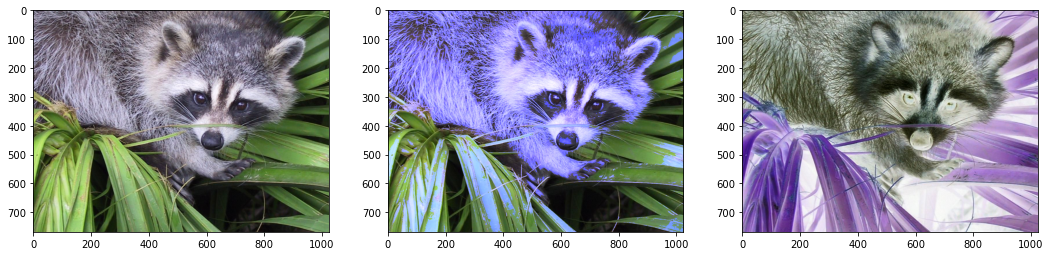

In [7]:
rocket = scipy.misc.face()         # A sample raccoon image with shape (768, 1024, 3)
rocket_mask = rocket[:,:,2] > 100  # Prepare a mask to select all pixels with more than 100 in the blue channel
rocket_neg = 255-rocket           # Negative of the source image

rocket_copy = rocket.copy()
rocket_copy[rocket_mask, 2] = 255  # Saturate the blue channel for the selected pixels

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(rocket)
plt.subplot(132)
plt.imshow(rocket_copy)
plt.subplot(133)
plt.imshow(rocket_neg)
plt.show()

### Combining basic and advanced indexing
When there is at least one slice `:`, ellipsis `...` or `newaxis` in the index, or the array has more dimensions than there are advanced indices, then the behaviour can get a little more complicated. It is like concatenating the indexing result for each advanced index element.

In the simplest case, there is only a single advanced index combined with a slice. In that scenario, the slice and index array operation are independent, as we can see in the following example.

In [140]:
a = np.arange(25).reshape(5,5)
print(f'{a = }')
print(f'{a[[0,2,4], 1:4] = }')
print(f'{a[:,1:4][(0,2,4),:] = }')

a = array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
a[[0,2,4], 1:4] = array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])
a[:,1:4][(0,2,4),:] = array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])


A single advanced index can, for example, replace a slice and the result array will be the same. However, it is a copy and may have a different memory layout. A slice is preferable when it is possible.

In [37]:
a = np.arange(25).reshape(5,5)
base_sel = a[1:2, 1:3]
advanced_sel = a[1:2, [1,2]]
print(f'{base_sel = }')     # Basic selection
print(f'{advanced_sel = }') # Advanced selection
print(np.shares_memory(base_sel, a))
print(np.shares_memory(advanced_sel, a))

base_sel = array([[6, 7]])
advanced_sel = array([[6, 7]])
True
False


The following image displays a few indexing examples, for reference. Indices of each cell are indicated between parentheses for readability.

<center><img src="NumPy_select.png"></img></center>

### Views and copies

As we have seen, we have to expect different outcomes according to the kind of indexing we are performing.
As a reminder, basic indexing will always return a view while fancy indexing will always return a copy. This difference is important because in the former case, modifying the view modifies the base array while this is not true in the latter case.


In [40]:
z = np.zeros(10, dtype=int)
print(f'{z = }')
z_view = z[::2]
print(f'{z_view = }')
z_view[...] = 1
print(f'{z_view = }')
print(f'{z = }')

z = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z_view = array([0, 0, 0, 0, 0])
z_view = array([1, 1, 1, 1, 1])
z = array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])


In [22]:
z = np.zeros(10, dtype=int)
print(f'{z = }')
z_copy = z[[x for x in range(10) if x % 2 == 0]]
print(f'{z_copy = }')
z_copy[...] = 1
print(f'{z_copy = }')
print(f'{z = }')

z = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z_copy = array([0, 0, 0, 0, 0])
z_copy = array([1, 1, 1, 1, 1])
z = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


If we are not sure whether we have a view or a copy, we can explicitly check for it. If the `base` of our result is `None`, then the result is a copy. We can also use `np.shares_memory` to see if two arrays share the same data buffer.

In [41]:
z = np.zeros(10, dtype=int)
z_view = z[::2]
z_copy = z[[x for x in range(10) if x % 2 == 0]]
print(z_view.base is z)
print(z_copy.base is z)
print(np.shares_memory(z_view, z))
print(np.shares_memory(z_copy, z))

True
False
True
False


Copies can be made explicitly, like in the previous examples, but most of the time they arise implicitly from our processing. For instance, we may create implicit intermediary copies while performing some arithmetic with arrays.

In [3]:
a = np.ones(10, dtype=int)
b = np.ones(10, dtype=int)
c = 3*a+2*b

In the example above, three intermediate arrays have been created without us noticing. The first is responsible for holding the result of `3*a`, the second is responsible for holding the result of `2*b` and the third one is responsible for holding the result of `3*a+2*b`. If the intermediary objects are small enough, we can disregard such a behaviour. On the other hand, if our arrays are big, we must be careful with such expressions and evaluate whether there is a better way to write them. If we are not interested in keeping the original values, we may overwrite the existing arrays and perform the desired computation in place without intermediary objects.

In [4]:
a = np.ones(10, dtype=int)
b = np.ones(10, dtype=int)
np.multiply(a, 3, out=a)
np.multiply(b, 2, out=b)
np.add(a, b, out=a)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

#### Example: Sudoku stride view

The `ndarray` class has a `strides` field, which we glossed over before, that indicates the number of bytes to step in each dimension when going through an array. A whole subsection of the NumPy library, `numpy.lib.stride_tricks`, is dedicated to stride manipulation.

Let's apply some stride tricks to the problem of splitting a Sudoku puzzle into the $3\times 3$ squares it is composed of.
We will use `np.lib.stride_tricks.as_strided` to create a view into our Sudoku array with our desired shape and strides.

As a cautionary note, consider the following example as a rather advanced one.

In [ ]:
sudoku = np.array([
    [2, 8, 7, 1, 6, 5, 9, 4, 3],
    [9, 5, 4, 7, 3, 2, 1, 6, 8],
    [6, 1, 3, 8, 4, 9, 7, 5, 2],
    [8, 7, 9, 6, 5, 1, 2, 3, 4],
    [4, 2, 1, 3, 9, 8, 6, 7, 5],
    [3, 6, 5, 4, 2, 7, 8, 9, 1],
    [1, 9, 8, 5, 7, 3, 4, 2, 6],
    [5, 4, 2, 9, 1, 6, 3, 8, 7],
    [7, 3, 6, 2, 8, 4, 5, 1, 9]
])

shape = (3, 3, 3, 3) # A 3x3 matrix of 3x3 sub-matrices
strides = sudoku.itemsize * np.array([27, 3, 9, 1]) # Steps to move to the next element along the various dimensions
squares = np.lib.stride_tricks.as_strided(sudoku, shape=shape, strides=strides)
print(f'squares = \n{squares}\n')
print(f'squares[1] = \n{squares[1]}\n')
print(f'squares[0, 1]= \n{squares[0, 1]}\n')
print(f'squares[0, 0, 1] = \n{squares[0, 0, 1]}\n')
print(f'squares[0, 0, 0, 1] = \n{squares[0, 0, 0, 1]}\n')

squares = 
[[[[2 8 7]
   [9 5 4]
   [6 1 3]]

  [[1 6 5]
   [7 3 2]
   [8 4 9]]

  [[9 4 3]
   [1 6 8]
   [7 5 2]]]


 [[[8 7 9]
   [4 2 1]
   [3 6 5]]

  [[6 5 1]
   [3 9 8]
   [4 2 7]]

  [[2 3 4]
   [6 7 5]
   [8 9 1]]]


 [[[1 9 8]
   [5 4 2]
   [7 3 6]]

  [[5 7 3]
   [9 1 6]
   [2 8 4]]

  [[4 2 6]
   [3 8 7]
   [5 1 9]]]]

squares[1] = 
[[[8 7 9]
  [4 2 1]
  [3 6 5]]

 [[6 5 1]
  [3 9 8]
  [4 2 7]]

 [[2 3 4]
  [6 7 5]
  [8 9 1]]]

squares[0, 1]= 
[[1 6 5]
 [7 3 2]
 [8 4 9]]

squares[0, 0, 1] = 
[9 5 4]

squares[0, 0, 0, 1] = 
8



The following image should make it more clear our choice of stride steps. We have to take into account the number of elements we have to skip in order to access the next element of each dimension. It is easier to visualize the new strided representation of our array taking into account the *outer* $3\times 3$ grid (thicker border lines) and the inner $3\times 3$ grids (lighter border lines). To move along the first dimension (yellow) we have to skip $27$ elements. To move along the second dimension (blue) we have to skip three elements. To move along the third dimension (green) we have to skip $9$ elements. To move along the fourth dimension (red) we have to skip just one element.

<center><img src="sudoku_stride.png"></img></center>

## Arrays manipulation

When working with data in array form, it is often useful to rearrange arrays and alter the way they are interpreted.
So far we have seen just a few of them in action, but NumPy provides a rich set of functions and methods of this type of manipulation.
We are not going to cover all of them, but it is convenient to know at least of their existence.

| Method | Description |
|---|---|
| `np.reshape`, `np.ndarray.reshape` | Reshape a multi-dimensional array. The total number of elements must remain the same. |
| `np.ndarray.flatten` | Creates a copy of a multi-dimensional array, and reinterpret it as a one-dimensional array basically collapsing all dimensions into one. |
| `np.ravel`, `np.ndarray.ravel` | Create a view, or a copy, of a multi-dimensional array in which it is interpreted as a one-dimensional array. |
| `np.squeeze` | Removes axes with length 1. |
| `np.expand_dims`, `np.newaxis` | Add a new dimension of length 1 to an array, where `np.newaxis` is used with array indexing. |
| `np.transpose`, `np.ndarray.transpose`, `np.ndarray.T` | Transpose the array, where the transpose operation corresponds to permuting the axes of the array. |
| `np.hstack` | Stacks a list of arrays horizontally (along axis 1). For instance, given a list of column vectors, appends the columns to form a matrix. |
| `np.vstack` | Stacks a list of arrays vertically (along axis 0): For instance,  given a list of row vectors, appends the rows to form a matrix. |
| `np.dstack` | Stacks arrays depth-wise (along axis 2). |
| `np.concatenate` | Creates a new array by appending arrays after each other, along a given axis. |
| `np.resize` | Resizes an array. Creates a new copy of the original array, with the requested size. If necessary, the original array will be repeated to fill up the new array. |
| `np.append` | Appends an element to an array. Creates a new copy of the array. |
| `np.insert` | Inserts a new element at a given position. Creates a new copy of the array. |
| `np.delete` | Deletes an element at a given position. Creates a new copy of the array. |

### Manipulating dimensions and shapes
Reshaping an array does not require modifying the underlying array data. Reshaping only changes how the data is interpreted by redefining the array `strides` attribute. The requested new shape of the array must match the number of
elements in the original size. The number of axes, instead, does not need to be preserved. Note that reshaping an array produces a view of the array, and if an independent copy of the array is needed, the view has to be copied explicitly.

The `ravel` operation is a special case of reshape that collapses all dimensions of an array into one, returning its  flattened one-dimensional version. The resulting array has length that corresponds to the total number of elements in the original array. The method `flatten` performs the same function but returns a copy instead of a view.

If we need to increase an array dimensionality on the fly, adding new empty axes, we can use use the `np.newaxis` keyword at the place of a new axis.

The function `np.expand_dims` can also be used to add new dimensions to an array.
We can write the same statement in various equivalent ways, for instance we can use `data[:, np.newaxis]` or 
`np.expand_dims(data, axis=1)`, and `data[np.newaxis, :]` or `np.expand_dims(data, axis=0)` to obtain the very same result. The `axis` argument specifies the location relative to the existing axes where the new axis is to be inserted.

### Merging and stacking arrays
It is often necessary to merge arrays into bigger arrays, for example, when joining together data series. For this task, we have access to the functions `np.vstack`, for vertical stacking, and `np.hstack` for horizontal stacking. The function `np.concatenate` provides similar functionality, but it takes a keyword argument axis that specifies the axis along which the arrays are to be concatenated.

Let's see some stacking examples.

In [49]:
a = np.arange(5)
np.vstack((a, a, a))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [52]:
a = np.arange(5)
np.hstack((a, a, a)) # Probably not what we meant

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [53]:
a = np.arange(5)
a = a[:, np.newaxis]
np.hstack((a, a, a))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [94]:
a = np.arange(9).reshape(3,3)
print(f'Concatenate along axis 0 -> \n{np.concatenate((a,a), axis=0)}\n')
print(f'Concatenate along axis 1 -> \n{np.concatenate((a,a), axis=1)}\n')
print(f'Concatenate along axis 2 -> \n{np.concatenate((a,a), axis=2)}\n')

Concatenate along axis 0 -> 
[[0 1 2]
 [3 4 5]
 [6 7 8]
 [0 1 2]
 [3 4 5]
 [6 7 8]]

Concatenate along axis 1 -> 
[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]



AxisError: axis 2 is out of bounds for array of dimension 2

In [108]:
a = np.arange(8).reshape(2,2,2)
print(f'Concatenate along axis 0 -> \n{np.concatenate((a,a), axis=0)}\n')
print(f'Concatenate along axis 1 -> \n{np.concatenate((a,a), axis=1)}\n')
print(f'Concatenate along axis 2 -> \n{np.concatenate((a,a), axis=2)}\n')

7
Concatenate along axis 0 -> 
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]

 [[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

Concatenate along axis 1 -> 
[[[0 1]
  [2 3]
  [0 1]
  [2 3]]

 [[4 5]
  [6 7]
  [4 5]
  [6 7]]]

Concatenate along axis 2 -> 
[[[0 1 0 1]
  [2 3 2 3]]

 [[4 5 4 5]
  [6 7 6 7]]]



### Splitting arrays
We have just seen how to assemble multiple arrays through stacking. The opposite operation is possible as well. In NumPy, we can perform splitting to do so, using functions that work both horizontally, `np.hsplit()`, and vertically `np.vsplit()` and in a more general way `np.split()`.

In [47]:
a = np.arange(16).reshape((4, 4))
b, c = np.hsplit(a, 2)
print(f'{a = }\n{a.shape = }\n')
print(f'{b = }\n{b.shape = }\n')
print(f'{c = }\n{c.shape = }\n')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a.shape = (4, 4)

b = array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])
b.shape = (4, 2)

c = array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])
c.shape = (4, 2)



In [50]:
a = np.arange(16).reshape((4, 4))
b, c, d, e = np.vsplit(a, [1,2,3])
print(f'{a = }\n{a.shape = }\n')
print(f'{b = }\n{b.shape = }\n')
print(f'{c = }\n{c.shape = }\n')
print(f'{d = }\n{d.shape = }\n')
print(f'{e = }\n{e.shape = }\n')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a.shape = (4, 4)

b = array([[0, 1, 2, 3]])
b.shape = (1, 4)

c = array([[4, 5, 6, 7]])
c.shape = (1, 4)

d = array([[ 8,  9, 10, 11]])
d.shape = (1, 4)

e = array([[12, 13, 14, 15]])
e.shape = (1, 4)



In [52]:
a = np.arange(16).reshape((4, 4))
x,y,z = np.split(a,[1,3],axis=1)
print(f'{a = }\n{a.shape = }\n')
print(f'{x = }\n{x.shape = }\n')
print(f'{y = }\n{y.shape = }\n')
print(f'{z = }\n{z.shape = }\n')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a.shape = (4, 4)

x = array([[ 0],
       [ 4],
       [ 8],
       [12]])
x.shape = (4, 1)

y = array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14]])
y.shape = (4, 2)

z = array([[ 3],
       [ 7],
       [11],
       [15]])
z.shape = (4, 1)



In [12]:
# Split a 4x4 matrix in 4 2x2 matrices representing top-left, top-right, bottom-left and bottom-right parts.
a = np.arange(16).reshape((4, 4))
x, y = 2, 2
print(f'{a = }\n{a.shape = }\n')
subs = np.split(np.concatenate(np.split(a, y, axis=1)), x*y)
for sub in subs:
    print(f'{sub = }\n{sub.shape = }\n')

a = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
a.shape = (4, 4)

[array([[0, 1],
       [4, 5]]), array([[ 8,  9],
       [12, 13]]), array([[2, 3],
       [6, 7]]), array([[10, 11],
       [14, 15]])]
sub = array([[0, 1],
       [4, 5]])
sub.shape = (2, 2)

sub = array([[ 8,  9],
       [12, 13]])
sub.shape = (2, 2)

sub = array([[2, 3],
       [6, 7]])
sub.shape = (2, 2)

sub = array([[10, 11],
       [14, 15]])
sub.shape = (2, 2)



### Inserting and removing items
Since the size of NumPy arrays is fixed after their creation, the number of elements in them cannot be changed afterwards. To insert, append, and remove elements from a NumPy array, for example, we have to rely on functions like `np.append()`, `np.insert()`, and `np.delete()`, that create a new array with the original data copied into it. When using those methods, we must pay attention to the arguments we use and make sure the end results match our expectations.

In [14]:
a = np.append([1, 2], [[3, 4], [5, 6]])
print(f'{a = }\n{a.shape = }\n')
b = np.append([[1, 2], [3, 4]], [[5, 6]], axis=0)
print(f'{b = }\n{b.shape = }\n')
c = np.append([[1, 2], [3, 4]], [5, 6], axis=0) # When using axis, values MUST HAVE the correct shape!
print(f'{c = }\n{c.shape = }\n')

a = array([1, 2, 3, 4, 5, 6])
a.shape = (6,)

b = array([[1, 2],
       [3, 4],
       [5, 6]])
b.shape = (3, 2)



ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [4]:
a = np.arange(10)
b = np.insert(a, 1, -1)
c = np.insert(a, [1,3,5], [-1, -2, -3])
print(f'{a = }')
print(f'{b = }')
print(f'{c = }')

a = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9])
c = array([ 0, -1,  1,  2, -2,  3,  4, -3,  5,  6,  7,  8,  9])


In [2]:
a = np.array([[1, 1], [2, 2], [3, 3]])
b = np.insert(a, 1, -1)
c = np.insert(a, 1, -1, axis=0)
d = np.insert(a, 1, -1, axis=1)
print(f'{a = }\n{a.shape = }\n')
print(f'{b = }\n{b.shape = }\n')
print(f'{c = }\n{c.shape = }\n')
print(f'{d = }\n{d.shape = }\n')

a = array([[1, 1],
       [2, 2],
       [3, 3]])
a.shape = (3, 2)

b = array([ 1, -1,  1,  2,  2,  3,  3])
b.shape = (7,)

c = array([[ 1,  1],
       [-1, -1],
       [ 2,  2],
       [ 3,  3]])
c.shape = (4, 2)

d = array([[ 1, -1,  1],
       [ 2, -1,  2],
       [ 3, -1,  3]])
d.shape = (3, 3)



In [32]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = np.delete(a, 1, axis=0)
c = np.delete(a, 1, axis=1)
print(f'{a = }\n{a.shape = }\n')
print(f'{b = }\n{b.shape = }\n')
print(f'{c = }\n{c.shape = }\n')

a = array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])
a.shape = (3, 4)

b = array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])
b.shape = (2, 4)

c = array([[ 1,  3,  4],
       [ 5,  7,  8],
       [ 9, 11, 12]])
c.shape = (3, 3)



Sometime it is more convenient to *mask* an array rather than delete its contents. We can achieve the same result as before without being destructive. We can thus define a limited view on our array and use it as we please.

In [44]:
print(f'{a[np.array([True,False,True]), ...] = }\n{a.shape = }\n')

a[np.array([True,False,True]), ...] = array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])
a.shape = (3, 4)



## Structured and record arrays

While often our data can be well represented by a homogeneous array of values, sometimes this is not the case.
NumPy provides a versatile data-type object that allows any `ndarray` to hold arbitrarily nested record-like items with named-field access to the sub-types, that let us represent structured arrays. The common use case is trying to represent data analogous to columns in a spread sheet. 

Before moving one, just a side note. If we find ourselves really needing record arrays, most likely we are venturing a bit far with respect to NumPy's scope, and moving toward what a Pandas' dataframes might be more suitable for. Nevertheless, record arrays may be useful and so it is worth being aware of their existence.

In [12]:
dog_record_type = np.dtype({'names':('name', 'age', 'race'), 'formats':((np.str_, 20), int, (np.str_, 30))})
dogs = np.zeros(3, dtype=dog_record_type)

In [13]:
name = ['Bruna', 'Joy', 'Balto']
age = [9, 4, 7]
race = ['German Shepherd', 'Australian Shepherd', 'Siberian Husky']

In [14]:
dogs['name'] = name
dogs['age'] = age
dogs['race'] = race
print(dogs)

[('Bruna', 9, 'German Sheperd') ('Joy', 4, 'Australian Shepherd')
 ('Balto', 7, 'Siberian Husky')]


Our data is now arranged together in one convenient block of memory, and with structured arrays we can now refer to values either by index or by name. Structured arrays supports the same operations we have seen so far, so, for instance, we could do Boolean masking, if we wanted to.

In [15]:
dogs[dogs['age'] > 5]['name']

array(['Bruna', 'Balto'], dtype='<U20')

In the previous definition, we declared our custom record type using a dictionary. This is not the only way. We could use tuples, instead.

In [21]:
icecream_record_type = np.dtype([('flavour', (np.str_, 25)), ('cream_based', bool), ('kcal', int)])
flavours = np.array([('Chocolate',True,216),('Strawberry', False, 182)],dtype=icecream_record_type)
print(flavours)

[('Chocolate',  True, 216) ('Strawberry', False, 182)]


NumPy also provides the `np.recarray` class, almost identical to structured arrays, whose fields can be accessed as attributes rather than as dictionary keys, using dot notation.

In [24]:
dogs_rec = dogs.view(np.recarray)
dogs_rec.name

array(['Bruna', 'Joy', 'Balto'], dtype='<U20')

The downside for record arrays, is that there is some additional overhead involved in accessing the fields.

In [27]:
%timeit dogs['name']
%timeit dogs_rec['name']
%timeit dogs_rec.name

116 ns ± 2.95 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.56 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.33 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Reading and writing array data on files

NumPy provides a set of functions that allows us to save the results of their calculations in a text or binary file. Similarly, NumPy allows us to read and convert written data in a file into an array.

In its most basic form, NumPy provides a pair of functions called `np.save()` and `np.load()` that conveniently enable us to save
and then later retrieve data stored in binary format. Once we have our array to save, we simply call the `save()` function specifying as arguments the name of the file and the array. The file will automatically be given the `.npy` extension. We can then recover the data stored using `load()` by specifying the filename as the argument, this time writing explicitly also its extension.

In [63]:
a = np.arange(16).reshape(4,4)
np.save('a4x4', a)
a[2] = 0

In [64]:
b = np.load('a4x4.npy')

In [65]:
print(f'{a =}')
print(f'{b =}')

a =array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 0,  0,  0,  0],
       [12, 13, 14, 15]])
b =array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])


Oftentimes, the data that we may want to read or save are in textural format. In those cases a binary file is not suitable, because we may want to access the files outside independently from the fact that we are working with NumPy or with any other application. We can read data from a text file and insert values into an array using a function called `np.genfromtxt()`. This function takes three arguments: the name of the file containing the data, the character that separates the values from each other , and whether the data contain column headers.

In [ ]:
# %load numpy_array.csv
x, y, z
1, 2, 3
2, 3,
3, 4, 5


In [73]:
a = np.genfromtxt('numpy_array.csv', delimiter=',', names=True)
print(f'{a = }')
print(f'{a.shape = }')

a = array([(1., 2.,  3.), (2., 3., nan), (3., 4.,  5.)],
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])
a.shape = (3,)


In the previous example, using `names=True`, we get a structured array in which the column headings have become the field names. This function implicitly performs two loops: the outer loop reads a line at a time, and the inner loop separates and converts the values contained in it, inserting the consecutive elements created specifically. If some data are missing, the function handle it automatically. If the shape is not consistent, though, an error is raised.

In [74]:
# %load numpy_array_2d.csv
1, 2, 3
2, 3, 4
3, 4, 5

In [76]:
a = np.genfromtxt('numpy_array_2d.csv', delimiter=',')
print(f'{a = }')
print(f'{a.shape = }')

a = array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]])
a.shape = (3, 3)


We can use the same function we have seen before to read classic `ndarray` as well.